In [1]:
import math
import numpy as np
import time
import cv2
import cython
from matplotlib import pyplot as plt
import matplotlib.image as mpimg


from scipy import ndimage as ndi
from subprocess import call
import cython_smoothing_ks

In [2]:
#Inputing Images
input_image_path = "/Users/khalidsaifullah/Desktop/CS512/AS2/data/Image2.jpeg"
# input_image_path = "/Users/khalidsaifullah/Desktop/CS512/AS2/data/Image3.png"

original_image = cv2.imread(input_image_path, cv2.IMREAD_COLOR)
print(original_image.shape)

(892, 1000, 3)


In [3]:
###Problem 1###

#Processing Images
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

windowName = "Drek"
trackbar_name = "Handler"
smoothing_kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]], dtype=float) / 16
max_smoothing_amount = 100

def smoothing_builtin(smoothing_amount):
    global original_image, processed_image1
    processed_image1 = original_image.copy()
    for i in range(smoothing_amount):
        processed_image1 = cv2.filter2D(src=processed_image1, ddepth=-1, kernel=smoothing_kernel)            
    cv2.imshow(windowName, processed_image1)


cv2.namedWindow(windowName)
cv2.createTrackbar(trackbar_name, windowName, 0, max_smoothing_amount, smoothing_builtin)
smoothing_builtin(0) #Calling the smoothing function

#Figure Delete
cv2.waitKey(0)
cv2.destroyWindow(windowName)
cv2.waitKey(1)

-1

In [ ]:
###Problem 2### Error

#Processing Images
original_image = cv2.imread(input_image_path, cv2.IMREAD_COLOR)
processed_image2 = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
# processed_image2 = processed_image2.astype(np.int32)

windowName = "Drek"
trackbar_name = "Handler"
smoothing_kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]], dtype=float) / 16
max_smoothing_amount = 100

def smoothing_cython(smoothing_amount):
    global original_image, processed_image2
    processed_image2 = original_image.copy()
    for i in range(smoothing_amount):
        processed_image2 =  cython_smoothing_ks.ks_apply_convolution(processed_image2, smoothing_kernel)            
    cv2.imshow(windowName, processed_image2)
    
    

cv2.imshow(windowName, processed_image2)

# cv2.namedWindow(windowName)
cv2.createTrackbar(trackbar_name, windowName, 0, max_smoothing_amount, smoothing_cython)
# smoothing_cython(0) #Calling the smoothing function

#Figure Delete
cv2.waitKey(0)
cv2.destroyWindow(windowName)
cv2.waitKey(1)

In [4]:
###Problem 3###

#Processing Images
scale = 0.5
width = int(original_image.shape[1] * scale)
height = int(original_image.shape[0] * scale)
dim = (width, height)

windowName = "Drek"
smoothing_kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]], dtype=float) / 16
# resize image
processed_image3 = original_image.copy()
processed_image3 = cv2.filter2D(src=processed_image3, ddepth=-1, kernel=smoothing_kernel)
processed_image3 = cv2.resize(original_image, dim, interpolation = cv2.INTER_AREA)

# print('Resized Dimensions : ',processed_image3.shape)


cv2.imshow(windowName, processed_image3)

#Figure Delete
cv2.waitKey(0)
cv2.destroyWindow(windowName)
cv2.waitKey(1)

-1

In [5]:
###Problem 4###

#Processing Images
scale = 2.0
width = int(processed_image3.shape[1] * scale)
height = int(processed_image3.shape[0] * scale)
dim = (width, height)

windowName = "Drek"
smoothing_kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]], dtype=float) / 16
# resize image
processed_image4 = cv2.resize(processed_image3, dim, interpolation = cv2.INTER_AREA)
processed_image4 = cv2.filter2D(src=processed_image4, ddepth=-1, kernel=smoothing_kernel)


# print('Resized Dimensions : ',processed_image4.shape)


cv2.imshow(windowName, processed_image3)

#Figure Delete
cv2.waitKey(0)
cv2.destroyWindow(windowName)
cv2.waitKey(1)

-1

In [6]:
print(processed_image1.shape)
# print(processed_image2.shape)
print(processed_image3.shape)
print(processed_image4.shape)

(892, 1000)
(446, 500)
(892, 1000)


In [ ]:
diff = cv2.subtract(processed_image1, processed_image4)

processed_image4 = cv2.normalize(diff, diff, 0, 255, cv2.NORM_MINMAX)

cv2.imshow(windowName, processed_image4)

#Figure Delete
cv2.waitKey(0)
cv2.destroyWindow(windowName)
cv2.waitKey(1)

In [13]:
###Problem 5###

original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
processed_image5 = original_image.copy()

edgesx = cv2.Sobel(processed_image5, -1, dx=1, dy=0, ksize=3)
edgesy = cv2.Sobel(processed_image5, -1, dx=0, dy=1, ksize=3)


cv2.imshow(windowName, cv2.normalize(edgesx, edgesx, 0, 255, cv2.NORM_MINMAX))
#Figure Delete
cv2.waitKey(0)
cv2.destroyWindow(windowName)
cv2.waitKey(1)


cv2.imshow(windowName, cv2.normalize(edgesy, edgesy, 0, 255, cv2.NORM_MINMAX))
#Figure Delete
cv2.waitKey(0)
cv2.destroyWindow(windowName)
cv2.waitKey(1)

-1

In [14]:
###Problem 6###

edges = edgesx + edgesy

cv2.imshow(windowName, cv2.normalize(edges, edges, 0, 255, cv2.NORM_MINMAX))

#Figure Delete
cv2.waitKey(0)
cv2.destroyWindow(windowName)
cv2.waitKey(1)

-1

In [17]:
# ###Problem 7###
max_pixels_interval = 50
vector_length = 10 #K, change this to change the length of the vectors

original_image = cv2.imread(input_image_path, cv2.IMREAD_COLOR)

def grad_vector(pixels_interval):
    global original_image, processed_image7, vector_length
    grad_vector_image = original_image.copy() #cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    
    gradient_x = edgesx
    gradient_y = edgesy
    mag_gradient = edges

    for row in range(0, grad_vector_image.shape[0], pixels_interval):
        for col in range(0, grad_vector_image.shape[1], pixels_interval):
            g_x = gradient_x[row][col]
            g_y = gradient_y[row][col]
            m_g = mag_gradient[row][col]
            
            if m_g > 0:
                angle = None
                
                if g_y:
                    angle = math.atan(g_x / g_y)
        
                else:
                    angle = 90 * math.pi / 180.0
                if angle:
                    
                    vec_x = row + vector_length * math.cos(angle)
                    vec_y = col + vector_length * math.sin(angle)

                    vec_x = int(vec_x)
                    vec_y = int(vec_y)
                    

                    cv2.arrowedLine(grad_vector_image, (col, row), (vec_y, vec_x), (0,0,255), 1)
    cv2.imshow(windowName, grad_vector_image)
    

    
cv2.imshow(windowName, original_image)
cv2.createTrackbar(trackbar_name, windowName, 20, max_pixels_interval, grad_vector)


#Figure Delete
cv2.waitKey(0)
cv2.destroyWindow(windowName)
cv2.waitKey(1)

-1

In [18]:
###Problem 8###

corner_harris_threshold = 100

def cornerHarris_opencv(threshold):
    global original_image
    processed_image8 = original_image.copy()
    gray = cv2.cvtColor(processed_image8,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)
    dst = cv2.dilate(dst,None)
    processed_image8[dst>threshold*0.0001*dst.max()]=[0,0,255]
    cv2.imshow(windowName, processed_image8)
    
cv2.imshow(windowName, original_image)
cv2.createTrackbar(trackbar_name, windowName, 0, corner_harris_threshold, cornerHarris_opencv)
cornerHarris_opencv(2)
    
#Figure Delete
cv2.waitKey(0)
cv2.destroyWindow(windowName)
cv2.waitKey(1)

-1

In [21]:
###Problem 9###

def cornerHarris_custom(num_points):
    global original_image, processed_image9
    I_x = edgesx
    I_y = edgesy
    Ixx = ndi.gaussian_filter(I_x**2, sigma=1)
    Ixy = ndi.gaussian_filter(I_y*I_x, sigma=1)
    Iyy = ndi.gaussian_filter(I_y**2, sigma=1)
    
    detA = Ixx * Iyy - Ixy ** 2
    # trace
    traceA = Ixx + Iyy

    harris_response = detA - 0.05 * traceA ** 2
    
    # Store the pixel co-ordinates and cornerness score for edges
    cornerScores = list()
    
    for row in range(harris_response.shape[0]):
        for col in range(harris_response.shape[1]):
            if harris_response[row][col] > 0:
                cornerScores.append((row, col, harris_response[row][col]))
    
    # Sort the pixels in decreasing order based on the value cornerness score
    cornerScores.sort(key= lambda x : x[2], reverse=True)  

    cornerScores_filtered = cornerScores[:num_points]  
  
    # k : Hyperparameter
    # It sigfinies that we are suppressing 5 pixels in the vicinity of top pixels
    k = 5

  
    for cornerScore in cornerScores_filtered:
        #print("Corner Score:",  cornerScore)
        for row in range(cornerScore[0] - k, cornerScore[0] + k):
            if row < 0 or row >= harris_response.shape[0] :
                continue
            for col in range(cornerScore[1] - k, cornerScore[1] + k):
                if col < 0 or col >= harris_response.shape[1]:
                    continue
                
                if (row, col, harris_response[row][col]) in cornerScores_filtered and row != cornerScore[0] and col != cornerScore[1]:
                    cornerScores_filtered.remove((row, col, harris_response[row][col]))
    
    # Mark the top pixels in red
    for cornerScore in cornerScores_filtered:
        original_image[cornerScore[0]][cornerScore[1]] =  [0,0,255]  
            
       
    cv2.imshow(windowName, original_image) 
 



cv2.imshow(windowName, original_image)
cv2.createTrackbar(trackbar_name, windowName, 10, 100, cornerHarris_custom)
cornerHarris_custom(30)


#Figure Delete
cv2.waitKey(0)
cv2.destroyWindow(windowName)
cv2.waitKey(1)

-1

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4580 - accuracy: 0.8743
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1192 - accuracy: 0.9658
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0721 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0500 - accuracy: 0.9852
Epoch 5/5
313/313 [==============================] - 0s 603us/step - loss: 0.0738 - accuracy: 0.9780
Test loss: 0.07383185625076294
Test accuracy: 0.9779999852180481
Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6754 - accuracy: 0.7746
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4955 - accuracy: 0.8343
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4359 - accuracy: 0.8567
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3924 - accuracy: 0.8692
Epoch 5/5
313/313 [=======================

Text(0, 0.5, 'Accuracy (%)')

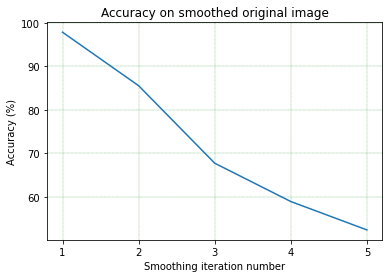

In [22]:
###Problem 10###

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

smoothing_kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]], dtype=float) / 16


# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

saved_results = []
###Smoothing 5 times
for i in range(5): #Change the value here for different no. of smoothing times

    if i == 0:
        y_train = to_categorical(y_train, 10)
        y_test = to_categorical(y_test, 10)

        # Define the model
        model = Sequential()
        model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
        model.add(Dense(10, activation='softmax'))



    # Evaluate the model on the test set
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=5, batch_size=128)

    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    saved_results = np.append(saved_results, test_accuracy)
    print('Test loss:', test_loss)
    print('Test accuracy:', test_accuracy)

    X_train = cv2.filter2D(src=X_train, ddepth=-1, kernel=smoothing_kernel)
    X_test = cv2.filter2D(src=X_test, ddepth=-1, kernel=smoothing_kernel)



plt.plot(range(1,6), saved_results*100)
plt.xticks(range(1,6))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.25)
plt.title('Accuracy on smoothed original image')
plt.xlabel('Smoothing iteration number')
plt.ylabel('Accuracy (%)')



Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.7843 - accuracy: 0.3854
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3966 - accuracy: 0.5326
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 1.2315 - accuracy: 0.5881
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 1.1206 - accuracy: 0.6293
Epoch 5/5
313/313 [==============================] - 0s 534us/step - loss: 1.3456 - accuracy: 0.5561
Test loss: 1.3455833196640015
Test accuracy: 0.5561000108718872
Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.1558 - accuracy: 0.6105
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 1.0431 - accuracy: 0.6470
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.9801 - accuracy: 0.6701
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.9169 - accuracy: 0.6934
Epoch 5/5
313/313 [========================

Text(0, 0.5, 'Accuracy (%)')

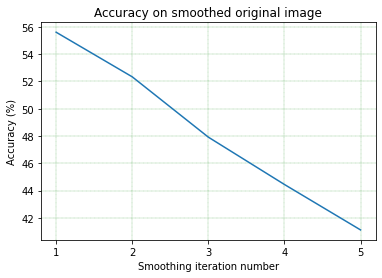

In [23]:
###Problem 10###

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

smoothing_kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]], dtype=float) / 16


# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

saved_results = []
###Smoothing


X_train_origin = X_train
X_test_origin = X_test


for i in range(5):


    X_train = cv2.filter2D(src=X_train_origin, ddepth=-1, kernel=smoothing_kernel)
    X_test = cv2.filter2D(src=X_test_origin, ddepth=-1, kernel=smoothing_kernel)
    X_train_origin = X_train
    X_test_origin = X_test

    edgesx = cv2.Sobel(X_train, -1, dx=1, dy=0, ksize=3)
    edgesy = cv2.Sobel(X_train, -1, dx=0, dy=1, ksize=3)
    edges = edgesx + edgesy
    X_train = edges



    edgesx = cv2.Sobel(X_test, -1, dx=1, dy=0, ksize=3)
    edgesy = cv2.Sobel(X_test, -1, dx=0, dy=1, ksize=3)
    edges = edgesx + edgesy
    X_test = edges

    if i == 0:
        y_train = to_categorical(y_train, 10)
        y_test = to_categorical(y_test, 10)

        # Define the model
        model = Sequential()
        model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
        model.add(Dense(10, activation='softmax'))



    # Evaluate the model on the test set
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=5, batch_size=128)

    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    saved_results = np.append(saved_results, test_accuracy)
    print('Test loss:', test_loss)
    print('Test accuracy:', test_accuracy)




plt.plot(range(1,6), saved_results*100)
plt.xticks(range(1,6))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.25)
plt.title('Accuracy on magnitude gradient image')
plt.xlabel('Smoothing iteration number')
plt.ylabel('Accuracy (%)')


